In [1]:
import os 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train_path = '/share/ju/nexar_data/nexar-scraper/scaffolding/train_data/labels/train'
validation_path = '/share/ju/nexar_data/nexar-scraper/scaffolding/train_data/labels/val'
test_path = '/share/ju/nexar_data/nexar-scraper/scaffolding/test_set/labels'

for phase, phase_path in [("train", train_path), ("validation", validation_path), ("test", test_path)]:
    print(phase.title() + ":")
    counter = Counter()
    for file in os.listdir(phase_path):
        file_path = os.path.join(phase_path, file)
        with open(file_path, "r") as file:
            content = file.readlines()
            for line in content:
                line = line.strip()
                if len(line):
                    counter.update(line[0])
    print(counter)
    print("#"*32)

Train:
Counter({'0': 728, '1': 57})
################################
Validation:
Counter({'0': 208, '1': 22})
################################
Test:
Counter({'0': 218, '1': 23})
################################


In [3]:
l = [name for name in os.listdir(test_path)]
print(f"{len(l)}")

2006


In [4]:
MAIN_PATH = '/share/ju/nexar_data/nexar-scraper/scaffolding/yolov7/runs/test/'
RUN_NAME = 'yolov7_scaffold_detection35'
R_DATA = f'{MAIN_PATH}{RUN_NAME}/R_data.csv'
P_DATA =  f'{MAIN_PATH}{RUN_NAME}/P_data.csv'
PR_DATA =  f'{MAIN_PATH}{RUN_NAME}/PR_data.csv'


x_values.name='Confidence'
x_values.name='Confidence'
x_values.name='Recall'


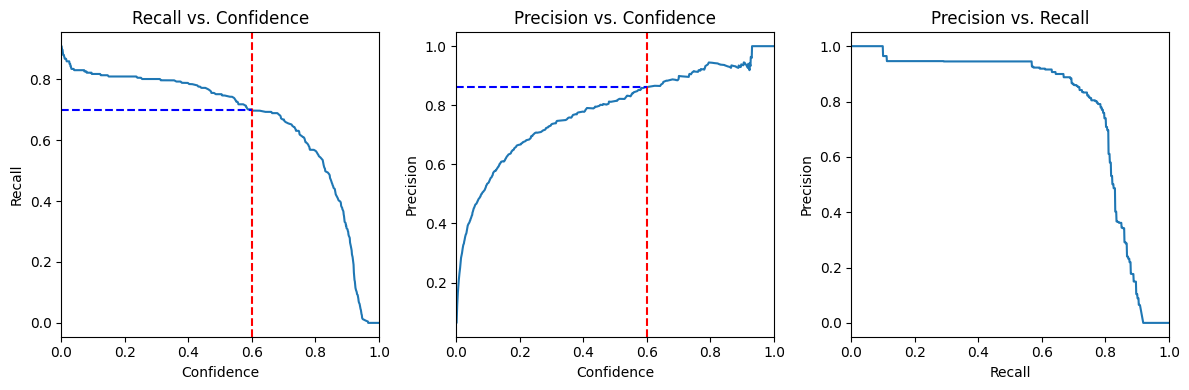

In [5]:
def plot_subplots_from_file(filename, num_subplot, ax):
    # Read the CSV file
    data = pd.read_csv(filename, index_col=0)

    x_values = data[data.columns[0]]
    y_values = data[data.columns[1]]
    
    # Create subplots
    ax[idx].plot(x_values, y_values, label=y_values.name)
    ax[idx].set_xlabel(x_values.name)
    ax[idx].set_ylabel(y_values.name)
    print(f"{x_values.name=}")
    if x_values.name == 'Confidence': 
        y_at_0_6 = np.interp(0.6, x_values, y_values)
        ax[idx].axvline(x=0.6, color='red', linestyle='--')
        ax[idx].axhline(y=y_at_0_6, xmin=0, xmax=0.6, color='blue', linestyle='--')
    
    ax[idx].set_title(f'{y_values.name} vs. {x_values.name}')
    ax[idx].set_xlim([0, 1])



fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for idx, path in enumerate([R_DATA, P_DATA, PR_DATA]):

    plot_subplots_from_file(path, idx, ax)


plt.tight_layout()
plt.show()

In [6]:
# Define the save path for the image
save_path = "/share/ju/nexar_data/nexar-scraper/scaffolding/images/P_R_PR_curves.png"

# Save the figure
fig.savefig(save_path, bbox_inches='tight', dpi=300)